MDE Techniken
Omnilab ist MDe

Code generation 
MDE ander beschrieben asl MBSE
MDE eher inklusiv

digital thread
digital companion

Threads to validity -- Model driven begriff-> what did we do?
geometric kinematics

logical vs physical why
AutomationML


Code generation meistens mit Modellen, die SE beschreiben


# packages

In [16]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [17]:
destination_folder = 'target/img/'

# imports

In [18]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt
from textwrap import wrap


# Read data variable from csv

In [19]:
df = pd.read_csv(filepath_or_buffer="data/04 extraction consolidation results_5.csv", sep="|")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
del metadata
del df
del titles

data.head()

# Create Individual Barcharts

occurrences_df = data["model processing technique"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per model processing technique')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.tight_layout()

plt.show()

data["modeling language"].value_counts()

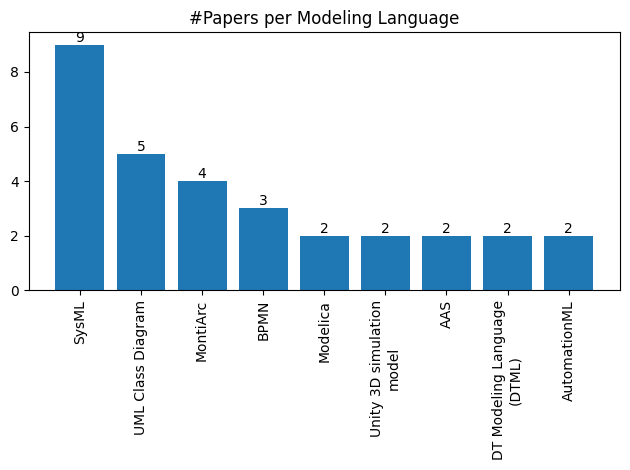

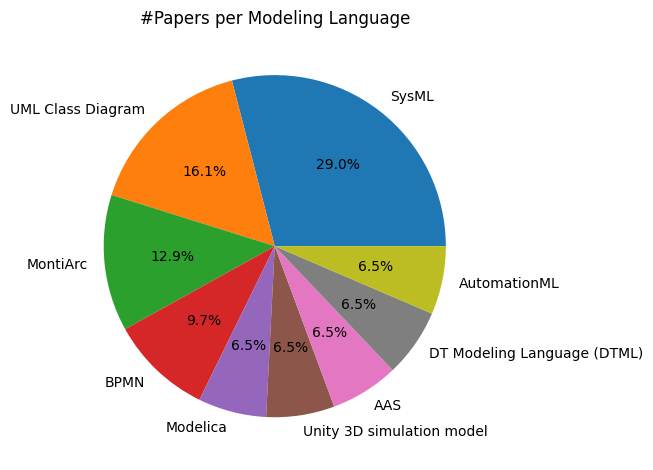

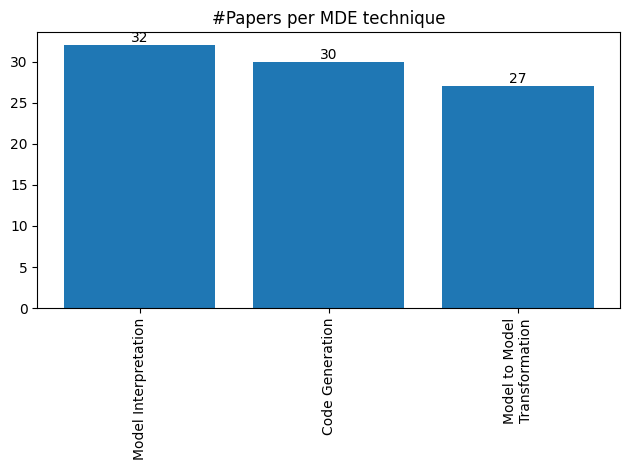

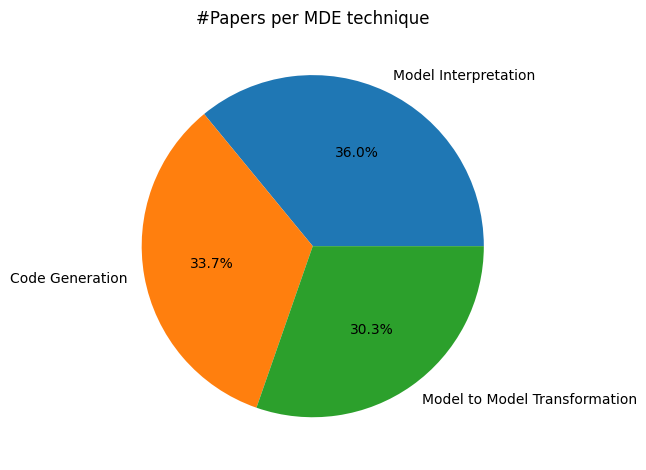

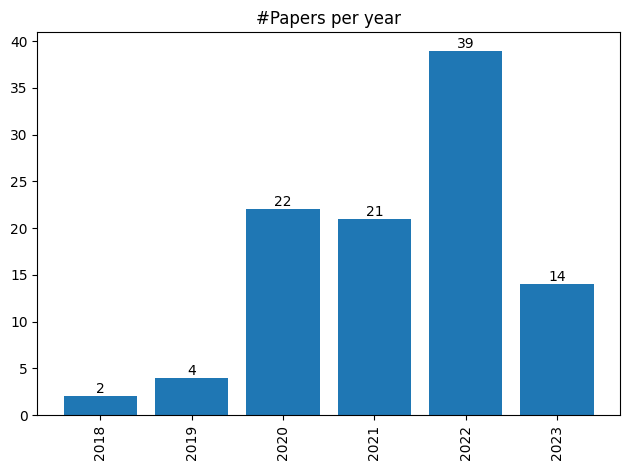

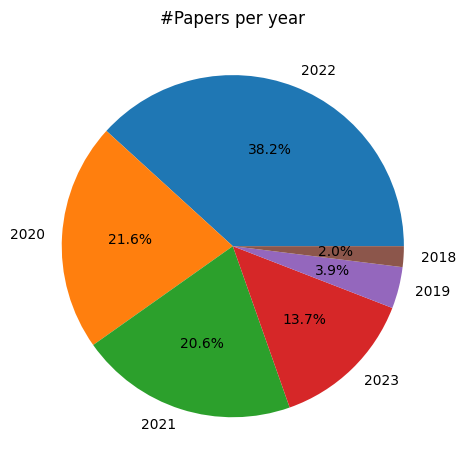

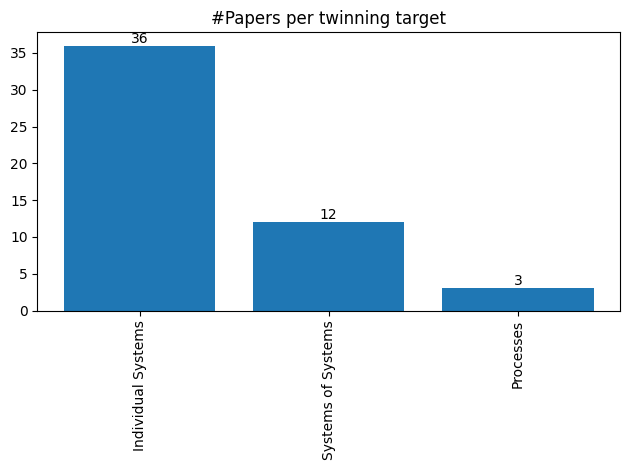

In [20]:
modeling_language = data["modeling language"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']
years = data["Publication Year"].value_counts().reset_index()
years.columns = ['entry', 'count']
years['entry'] = years['entry'].astype(int)
tt = data["twinning target"].value_counts().reset_index()
tt.columns = ['entry', 'count']

fig, axes = plt.subplots()

# List of DataFrames
dataframes = [modeling_language, mde_technique, years, tt]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique', '#Papers per year', '#Papers per twinning target']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[0])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.tight_layout()
plt.savefig(destination_folder+"MDE_barchart.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[0])
plt.tight_layout()
plt.savefig(destination_folder+"MDE_piechart.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[1])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0])
#plt.show()
plt.tight_layout()
plt.savefig(destination_folder+"MDE_barchart.jpg")


fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[1])
plt.tight_layout()
plt.savefig(destination_folder+"MDE_piechart.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[2])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.tight_layout()
# plt.savefig(destination_folder+"3 Papers per Year.jpg") - don't use for now

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[2]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[2])
plt.tight_layout()
# plt.savefig(destination_folder+"3 Papers per Year.jpg")  - don't use for now

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[3]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[3])
#entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"TT_barchart.jpg")


In [21]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


C:\Users\ac130903\AppData\Local\Temp\ipykernel_28432\2775539829.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


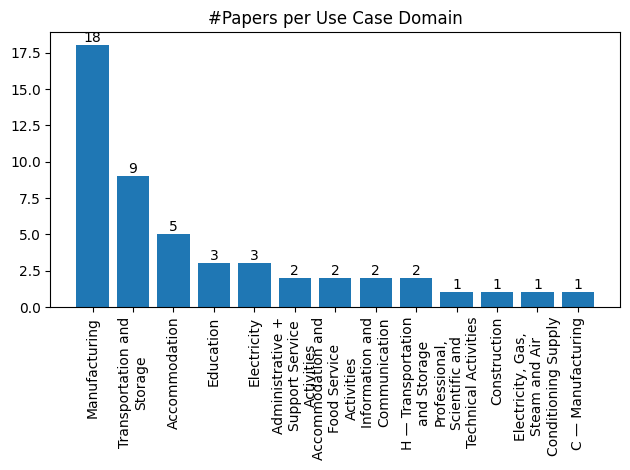

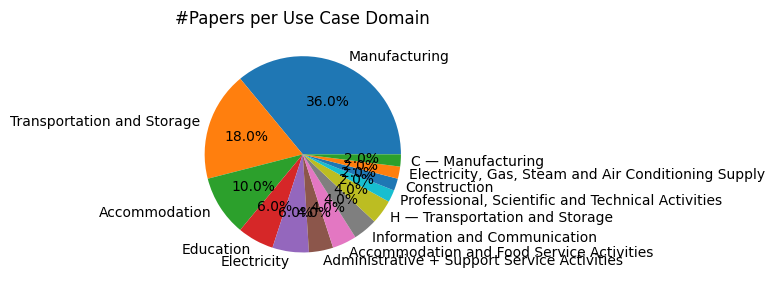

In [22]:
fig, axes = plt.subplots()
plot_data = dataframes[0]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[0])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"domain_barchart.jpg")


fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[0])
plt.tight_layout()
plt.savefig(destination_folder+"domain_barchart.jpg")

As-Designed
As-Operated


C:\Users\ac130903\AppData\Local\Temp\ipykernel_28432\2671813149.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


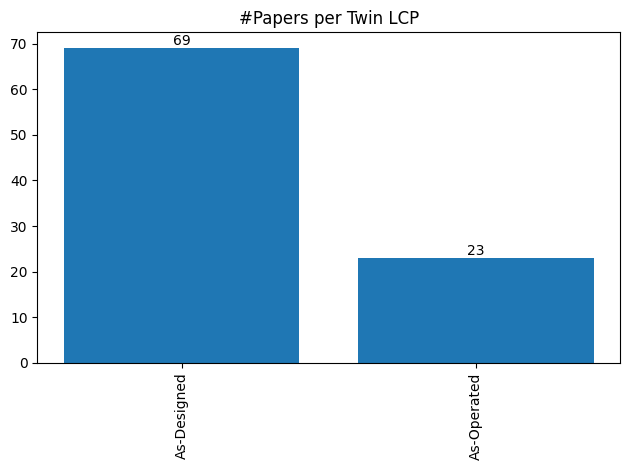

In [23]:
fig, axes = plt.subplots()
plot_data = dataframes[3]#.groupby(['entry']).filter(lambda x: len(x)>1)

for index, row in plot_data.iterrows():
    if ";" in row['entry']:
        values = row['entry'].split(";")
        for val in values:
            for index2, row2 in plot_data.iterrows():
                if row2['entry'] == val:
                    #change value by +1
                    print(row2['entry'])
                    plot_data.loc[plot_data['entry'].isin([row2['entry']]), 'count']+=1
        plot_data.drop(index, inplace=True)

axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[3])
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_barchart.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_28432\3885964591.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


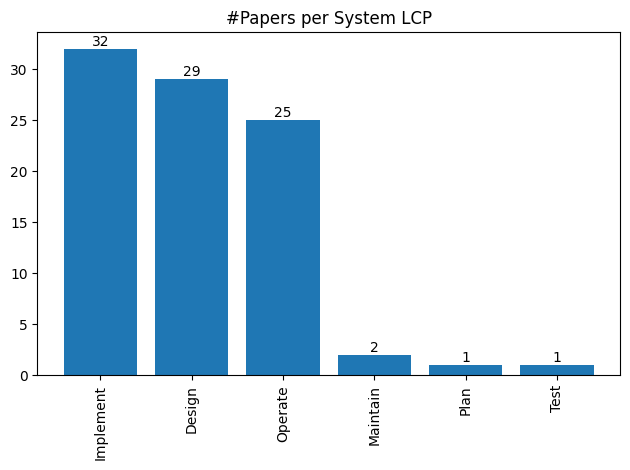

In [24]:
fig, axes = plt.subplots()
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_barchart.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_28432\1913103389.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(entry_data, rotation=90)


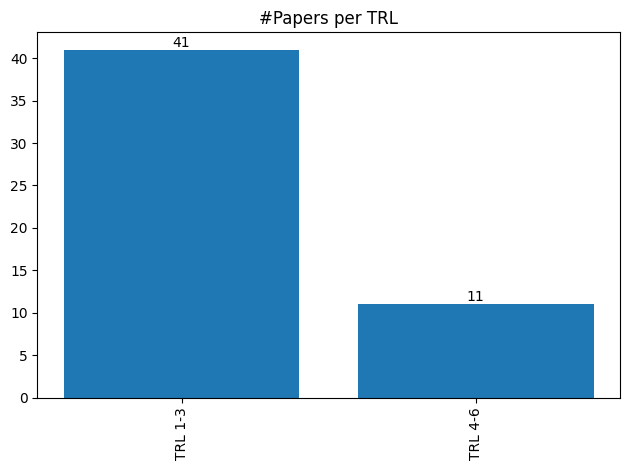

In [25]:



fig, axes = plt.subplots()
plot_data = dataframes[4]
entry_data = [ '\n'.join(wrap(l, 20)) for l in plot_data['entry'] ]
axes.bar(entry_data, plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[4])
axes.set_xticklabels(entry_data, rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles
plt.tight_layout()
plt.savefig(destination_folder+"3 Paper per TRL.jpg")


# Stacked Barcharts with MDE technique per X

occurrences_df = data["modeling language"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
occurrences_df = occurrences_df[occurrences_df['count'] > 1]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per modeling language')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

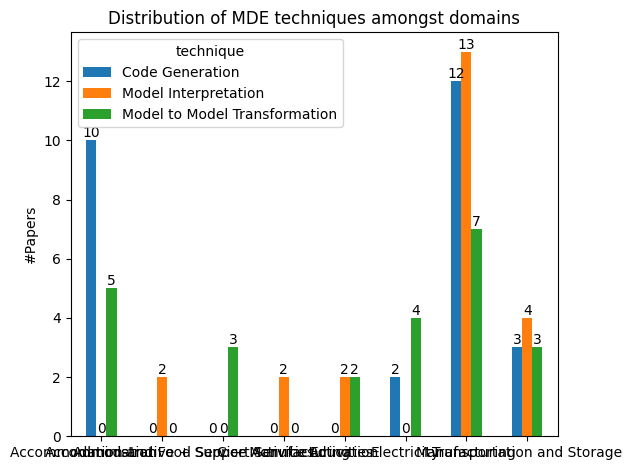

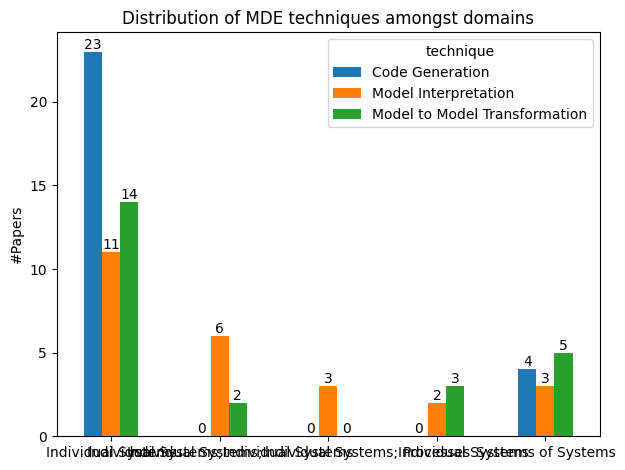

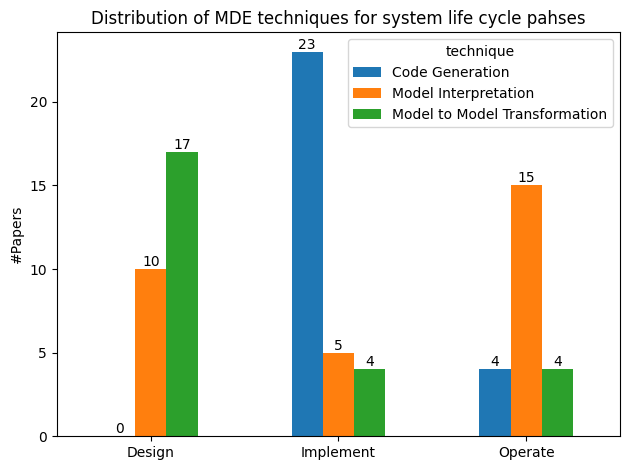

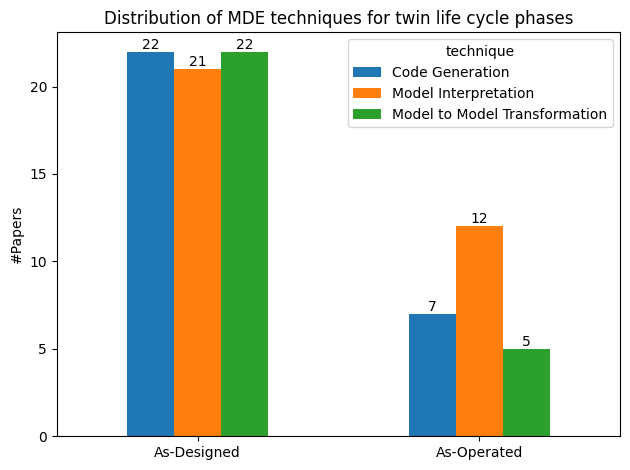

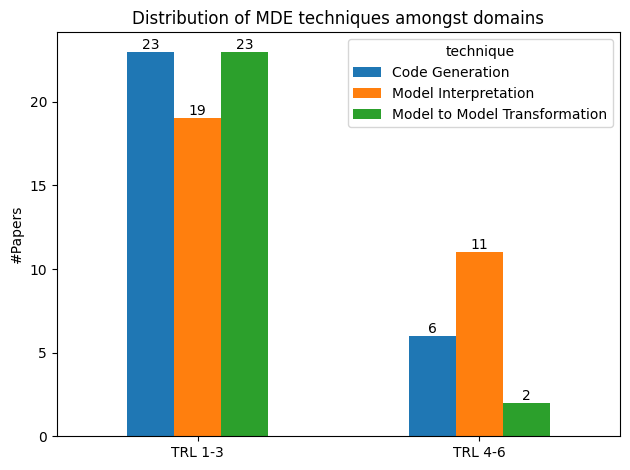

In [26]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])

with open("target/json/data_consolidated_semistructured__3.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = contents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": twinning_target, "technique": mdeContents["model processing technique"]}])
        twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)

fig, axes = plt.subplots()

domains_techniques = domains_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = domains_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes, rot= 0,
                                                                             ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_MDE_barchart.jpg")
#############################

fig, axes = plt.subplots()

twinning_target_techniques = twinning_target_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = twinning_target_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"TT_MDE_barchart.jpg")

#############################

fig, axes = plt.subplots()
system_lcp_techniques = system_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = system_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for system life cycle pahses", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_MDE_barchart.jpg")

#############################

fig, axes = plt.subplots()
twin_lcp_techniques = twin_lcp_techniques#.groupby(['value','technique']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in twin_lcp_techniques['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = twin_lcp_techniques.loc[index]['value'].split(";")
            trl = twin_lcp_techniques.loc[index]['technique']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "technique": trl}])
                twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)
    index += 1
twin_lcp_techniques = twin_lcp_techniques.drop(indexlist)

ax = twin_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for twin life cycle phases", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_MDE_barchart.jpg")

#############################

fig, axes = plt.subplots()
trl_techniques = trl_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = trl_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                         ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_MDE_barchart.jpg")

# Stacked barcharts with TRL per X

In [27]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__3.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    lang = contents["modeling language"]
    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = contents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)



In [28]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__3.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    #print(domain)
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    lang = contents["modeling language"]
    ### bugged
    for item in lang:
        #print(lang[item])
        new_line = pd.DataFrame([{"value": lang[item]["category"], 'trl': trl}])
        modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = contents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)

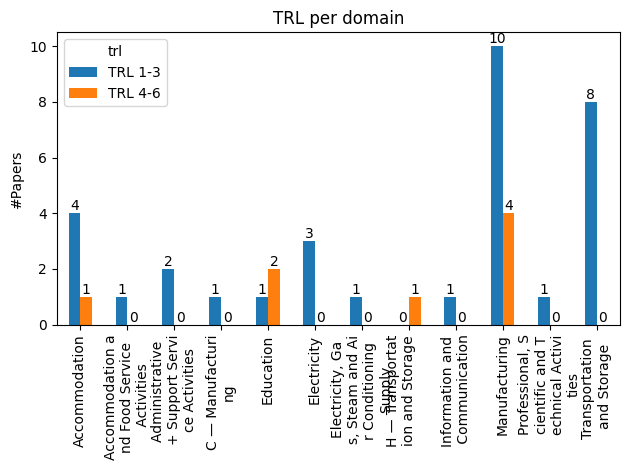

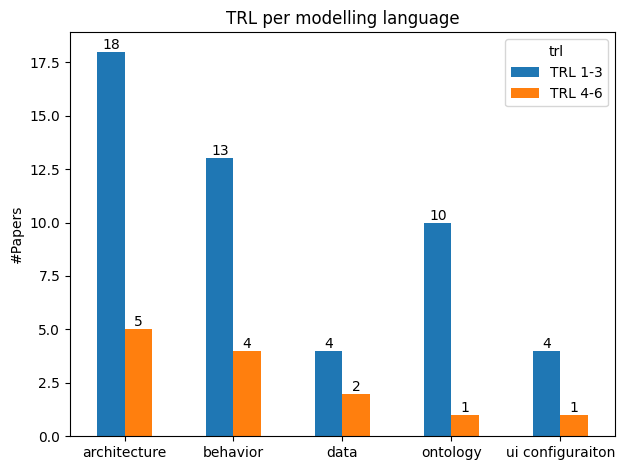

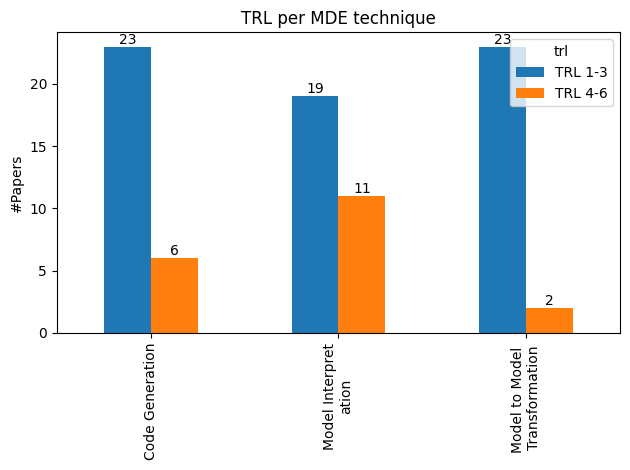

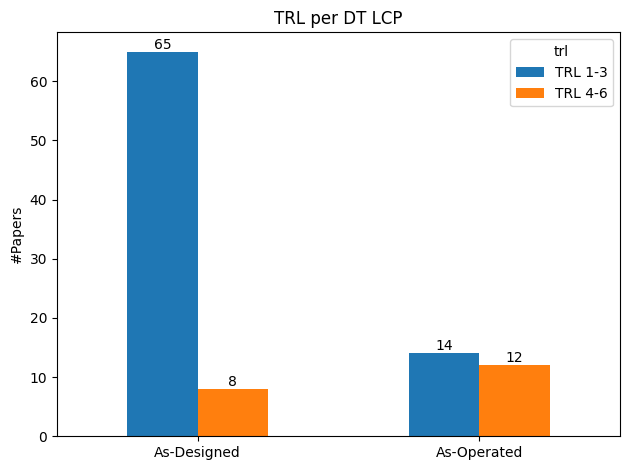

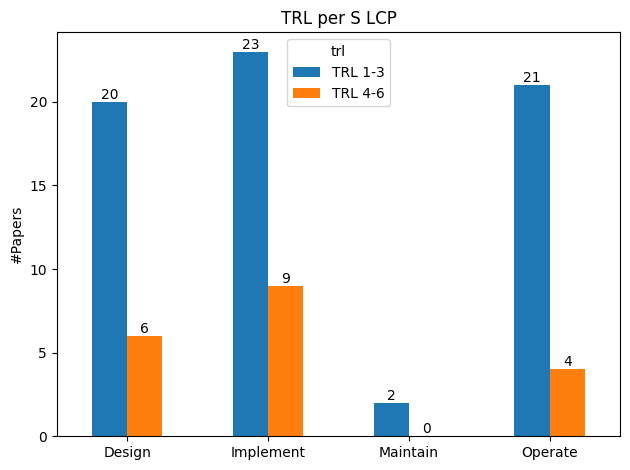

In [29]:
fig, axes = plt.subplots()

domain_trl = domain_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
import re

for text in domain_trl['value']:
    if text is not None:
        if len(text) > 15:
            domain_trl['value'] = domain_trl['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))
            #text = re.sub("(.{13})", "\\1\n", text, 0, re.DOTALL)
            
ax = domain_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="TRL per domain", xlabel="")
label_pre = 0
dtrlList = domain_trl['value'].unique().tolist()
#dtrlList = dtrlList.sort()
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart.jpg")

#############################

fig, axes = plt.subplots()

modlang_trl = modlang_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = modlang_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#Papers", title="TRL per modelling language", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"Language_TRL_barchart.jpg")

#############################

fig, axes = plt.subplots()
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)

for text in mde_trl['value']:
    if text is not None:
        if len(text) > 15:
            mde_trl['value'] = mde_trl['value'].replace(text, re.sub("(.{15})", "\\1\n", text, 0, re.DOTALL))

ax = mde_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per MDE technique", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"TRL_MDE_barchart.jpg")

#############################

fig, axes = plt.subplots()
tlcp_trl = tlcp_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
indexlist = []
index = 0
for x in tlcp_trl['value']:
    if x is not None:
        if ";" in x:
            indexlist.append(index)
            #print(tlcp_trl.loc[index])
            values = tlcp_trl.loc[index]['value'].split(";")
            trl = tlcp_trl.loc[index]['trl']
            for val in values:
                new_line = pd.DataFrame([{"value": val, "trl": trl}])
                tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
    index += 1
tlcp_trl = tlcp_trl.drop(indexlist)
ax = tlcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#Papers", title="TRL per DT LCP", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"TLCP_TRL_barchart.jpg")

#############################

fig, axes = plt.subplots()
slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = slcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                         ylabel="#Papers", title="TRL per S LCP", xlabel="")
#plt.title('# Distribution of MDE techniques amongst domains')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"SLCP_TRL_barchart.jpg")

TODO: Design/Etc

# Stacked Barcharts with Domain per X

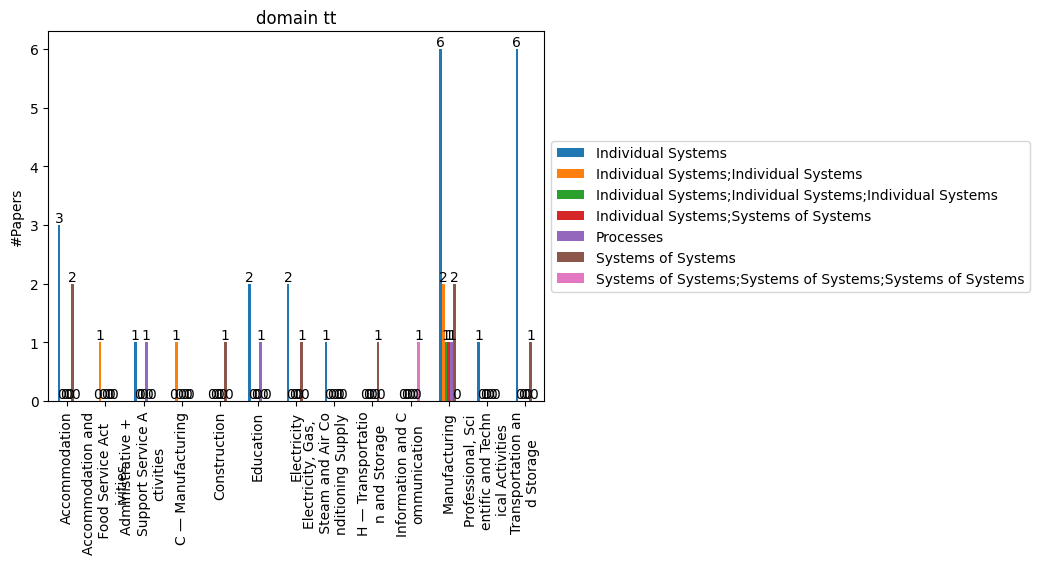

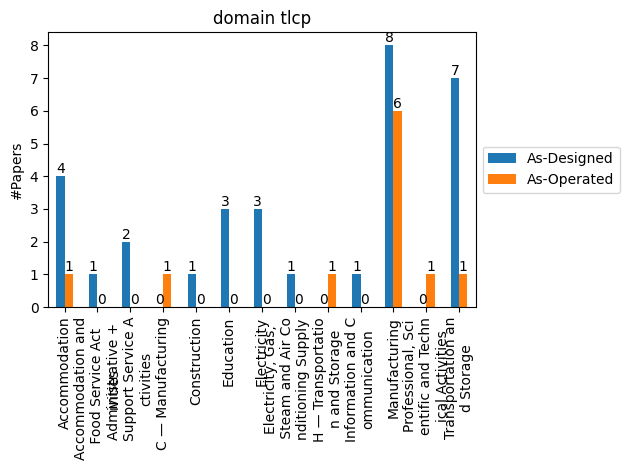

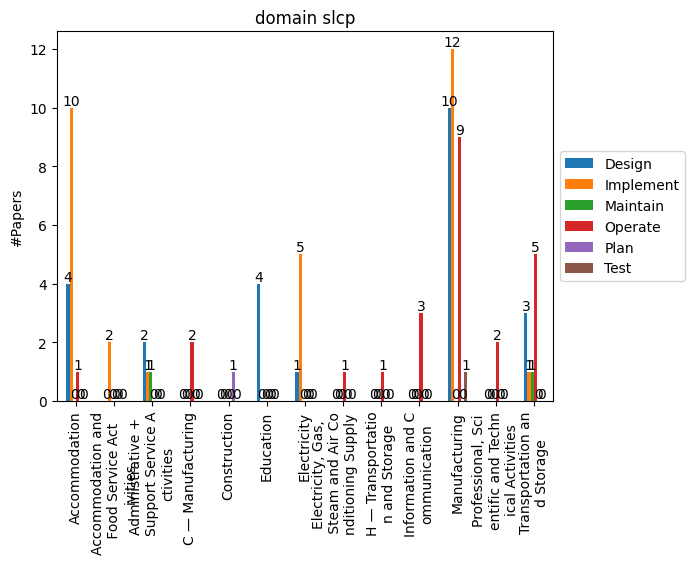

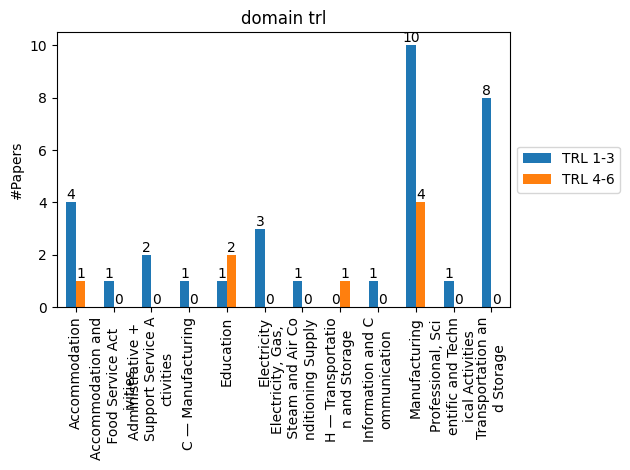

In [30]:
ucd_tt = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_tlcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_slcp = pd.DataFrame(columns = ['value', 'use case domain'])
ucd_trl = pd.DataFrame(columns = ['value', 'use case domain'])

with open("target/json/data_consolidated_semistructured__3.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
for title, contents in data_semistr.items():
    tlcp = contents["twin lifecycle phase"]
    tt = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"]

    try:
        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            slcp = mdeContents['system lifecycle phase']

            new_line = pd.DataFrame([{"value": slcp, 'use case domain': ucd}])
            ucd_slcp = pd.concat([ucd_slcp, new_line], ignore_index=True)
            
        new_line = pd.DataFrame([{"value": tt, 'use case domain': ucd}])
        ucd_tt = pd.concat([ucd_tt, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": trl, 'use case domain': ucd}])
        ucd_trl = pd.concat([ucd_trl, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": tlcp, 'use case domain': ucd}])
        ucd_tlcp = pd.concat([ucd_tlcp, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()
ucd_tt = ucd_tt#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

for text in ucd_tt['use case domain']:
    if text is not None:
        if len(text) > 17:
            ucd_tt['use case domain'] = ucd_tt['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))
ax = ucd_tt.groupby(['use case domain','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="domain tt", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"Domain_TT_barchart.jpg")


fig, axes = plt.subplots()
#ucd_tlcp = ucd_tlcp.groupby(['use case domain','value'])
ucd_tlcp = ucd_tlcp#.filter(lambda x : len(x) > 0)#.groupby(['value','use case domain'])
for text in ucd_tlcp['use case domain']:
    if text is not None:
        if len(text) > 17:
            ucd_tlcp['use case domain'] = ucd_tlcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))

ax = ucd_tlcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                         ylabel="#Papers", title="domain tlcp", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TLCP_barchart.jpg")



fig, axes = plt.subplots()
ucd_slcp = ucd_slcp#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
for text in ucd_slcp['use case domain']:
    if text is not None:
        if len(text) > 17:
            ucd_slcp['use case domain'] = ucd_slcp['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))

ax = ucd_slcp.groupby(['use case domain','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="domain slcp", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container)
#plt.tight_layout()
plt.savefig(destination_folder+"Domain_SLCP_barchart.jpg")



fig, axes = plt.subplots()
ucd_trl = ucd_trl#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
for text in ucd_trl['use case domain']:
    if text is not None:
        if len(text) > 17:
            ucd_trl['use case domain'] = ucd_trl['use case domain'].replace(text, re.sub("(.{17})", "\\1\n", text, 0, re.DOTALL))

ax = ucd_trl.groupby(['use case domain','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="domain trl", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig(destination_folder+"Domain_TRL_barchart.jpg")

# Testing

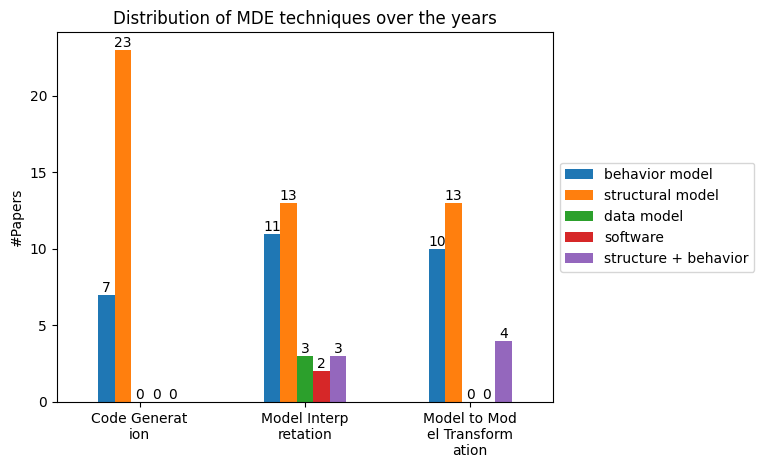

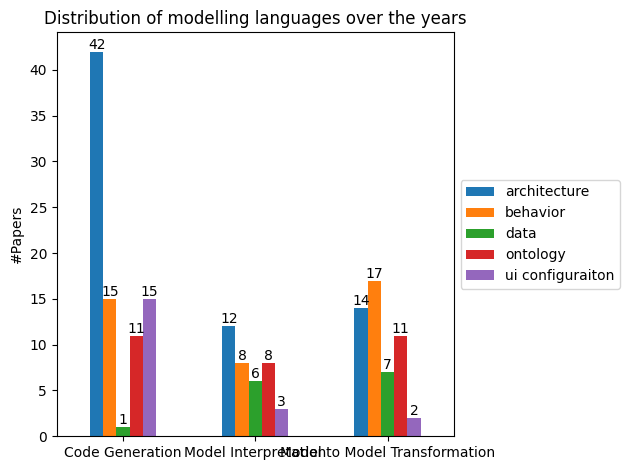

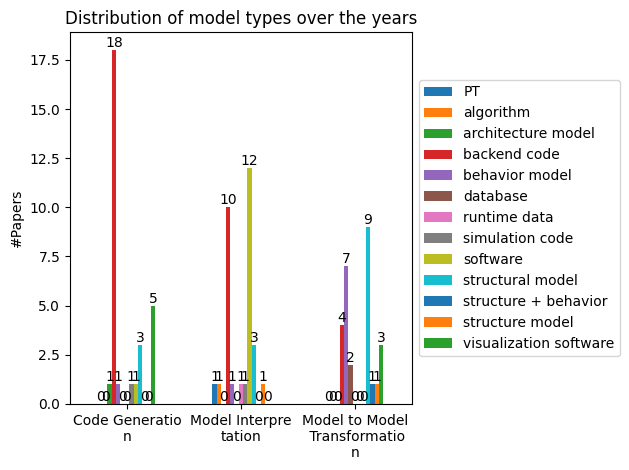

In [31]:
source_type = pd.DataFrame(columns = ['value', 'model processing technique'])
target_type = pd.DataFrame(columns = ['value', 'model processing technique'])
lang_type = pd.DataFrame(columns = ['value', 'model processing technique'])

with open("target/json/data_consolidated_semistructured__3.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:

        

        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            modeltype1 = mdeContents['model processing technique']

            for item in lang:
                new_line = pd.DataFrame([{"value": lang[item]["category"], 'model processing technique': modeltype1}])
                lang_type = pd.concat([lang_type, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": mdeContents['source category'], 'model processing technique': modeltype1}])
            source_type = pd.concat([source_type, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['target category'], 'model processing technique': modeltype1}])
            target_type = pd.concat([target_type, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()


source_type = source_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)

for text in source_type['model processing technique']:
    if text is not None:
        if len(text) > 12:
            source_type['model processing technique'] = source_type['model processing technique'].replace(text, re.sub("(.{12})", "\\1\n", text, 0, re.DOTALL))
ax = source_type.groupby(['model processing technique','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, rot= 0,
                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('Distribution of MDE techniques over the years')
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)


fig, axes = plt.subplots()
lang_type = lang_type.groupby(['model processing technique','value'])
lang_type = lang_type#.filter(lambda x : len(x) > 1).groupby(['value','Publication Year'])
for text in lang_type['model processing technique']:
    if text is not None:
        if len(text) > 14:
            lang_type['model processing technique'] = lang_type['model processing technique'].replace(text, re.sub("(.{14})", "\\1\n", text, 0, re.DOTALL))

ax = lang_type.size().unstack().plot(kind='bar', stacked=False, ax=axes, rot= 0,
                                                                         ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of modelling languages over the years')
plt.tight_layout()
plt.savefig(destination_folder+"source And MDE technique.jpg")



fig, axes = plt.subplots()
target_type = target_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
for text in target_type['model processing technique']:
    if text is not None:
        if len(text) > 14:
            target_type['model processing technique'] = target_type['model processing technique'].replace(text, re.sub("(.{14})", "\\1\n", text, 0, re.DOTALL))

ax = target_type.groupby(['model processing technique','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,rot= 0,
                                                                                     ylabel="#Papers", title="Distribution of model types over the years", xlabel="")
ax.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of model types over the years')
plt.tight_layout()
plt.savefig(destination_folder+"target And MDE technique.jpg")

# Source / Target

# heat map

In [32]:
source_tt = pd.DataFrame(columns = ['value', 'source category'])
source_tlcp = pd.DataFrame(columns = ['value', 'source category'])
source_slcp = pd.DataFrame(columns = ['value', 'source category'])
source_trl = pd.DataFrame(columns = ['value', 'source category'])
source_domain = pd.DataFrame(columns = ['value', 'source category'])

target_tt = pd.DataFrame(columns = ['value', 'target category'])
target_tlcp = pd.DataFrame(columns = ['value', 'target category'])
target_slcp = pd.DataFrame(columns = ['value', 'target category'])
target_trl = pd.DataFrame(columns = ['value', 'target category'])
target_domain = pd.DataFrame(columns = ['value', 'target category'])

with open("target/json/data_consolidated_semistructured__3.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]

    tlcp = contents["twin lifecycle phase"]
    tt = contents["twinning target"]
    trl = contents["Technological Readiness Level"]
    ucd = contents["use case domain"]

    try:
        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            sauce = mdeContents['source category']
            target = mdeContents['target category']
            slcp = mdeContents['system lifecycle phase']
            
            new_line = pd.DataFrame([{"value": tt, 'source category': sauce}])
            source_tt = pd.concat([source_tt, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": tlcp, 'source category': sauce}])
            source_tlcp = pd.concat([source_tlcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": slcp, 'source category': sauce}])
            source_slcp = pd.concat([source_slcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": trl, 'source category': sauce}])
            source_trl = pd.concat([source_trl, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": ucd, 'source category': sauce}])
            source_domain = pd.concat([source_domain, new_line], ignore_index=True)


            new_line = pd.DataFrame([{"value": tt, 'target category': target}])
            target_tt = pd.concat([target_tt, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": tlcp, 'target category': target}])
            target_tlcp = pd.concat([target_tlcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": slcp, 'target category': target}])
            target_slcp = pd.concat([target_slcp, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": trl, 'target category': target}])
            target_trl = pd.concat([target_trl, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": ucd, 'target category': target}])
            target_domain = pd.concat([target_domain, new_line], ignore_index=True)
    except KeyError as err:
        continue

y = [1] * len(source_tt['source category'].unique())
y2 = [1] * len(target_tt['target category'].unique())
targd_size = target_tt.groupby(['target category', 'value']).size()
line = []
#print(targd_size['architecture model']['Individual Systems'])
for targd in target_tt['target category'].unique().tolist():
        print(targd)
        try:
            line.append(targd_size[targd]['Individual Systems'])
        except Exception as err :
            line.append(0)
        try:
            line.append(targd_size[targd]['Systems of Systems'])
        except Exception as err :
            line.append(0)
        try:
            line.append(targd_size[targd]['Processes'])
        except Exception as err :
            line.append(0)

#print(source_tt.groupby(['source category', 'value']).size())

print(len(line))
print(targd_size)
print(np.array(line).reshape((3,8)))

backend code
database
visualization software
runtime data
structural model
None
behavior model
simulation code
architecture model
PT
software
structure model
algorithm
structure + behavior
42
target category         value                                                   
PT                      Individual Systems                                           1
algorithm               Individual Systems;Individual Systems                        1
architecture model      Individual Systems                                           1
backend code            Individual Systems                                          25
                        Processes                                                    1
                        Systems of Systems                                           3
behavior model          Individual Systems                                           5
                        Individual Systems;Individual Systems                        1
                        Process

ValueError: cannot reshape array of size 42 into shape (3,8)